Most Common Positive Ratings: Counter({'good': 2100, 'very good': 1079, 'excellent': 301})
Most Common Negative Ratings: Counter({'average': 3737, 'poor': 186})

Average Review Length: 1.34 words
Correlation between Review Length and Rating: -0.60 (p-value: 0.000)


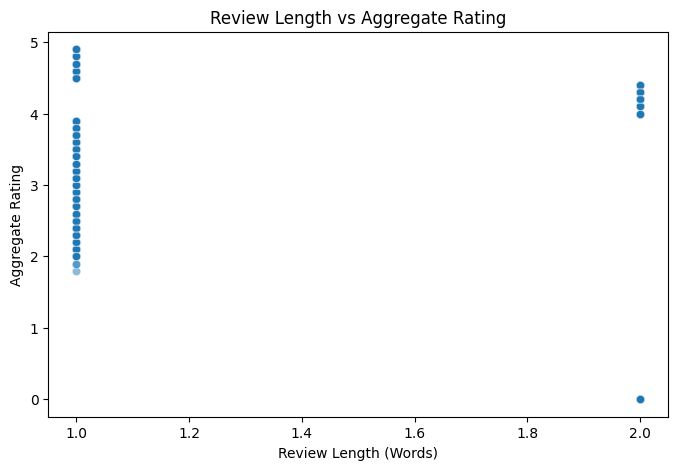

Top 5 Restaurants by Votes:
                 Restaurant Name  Votes  Aggregate rating
728                        Toit  10934               4.8
735                    Truffles   9667               4.7
3994           Hauz Khas Social   7931               4.3
2412                  Peter Cat   7574               4.3
739   AB's - Absolute Barbecues   6907               4.6

Bottom 5 Restaurants by Votes:
                  Restaurant Name  Votes  Aggregate rating
5799         Khalsa Eating Point      0               0.0
7411   Radha Swami Chaat Bhandar      0               0.0
7414  Ram Ram Ji Kachori Bhandar      0               0.0
7415          Rana's Food Corner      0               0.0
7416         Sanjay Chicken Shop      0               0.0
Correlation between Votes and Ratings: 0.31 (p-value: 0.000)


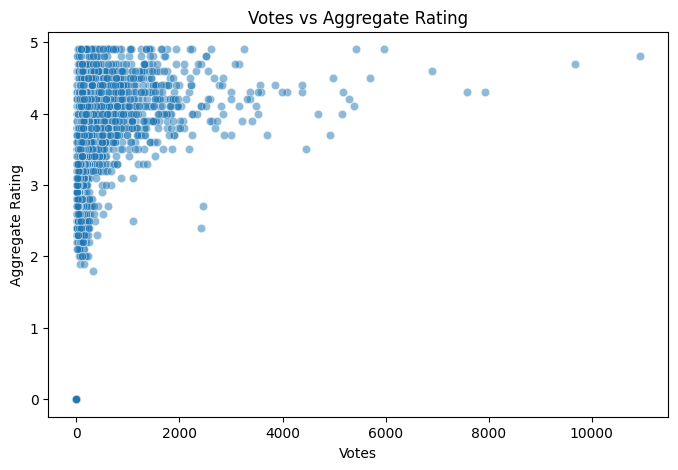


Service Availability by Price Range:
              Has Table booking  Has Online delivery
Price range                                        
1                            1                  701
2                          239                 1286
3                          644                  411
4                          274                   53

Chi-square test for Table Booking vs Price Range: p-value = 0.000
Chi-square test for Online Delivery vs Price Range: p-value = 0.000


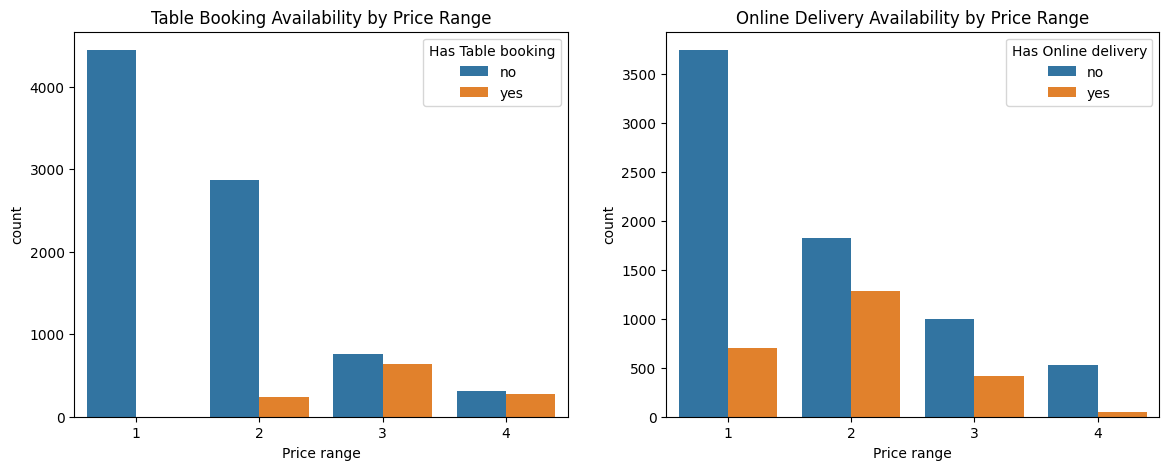

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency
from collections import Counter

# Load the dataset
file_path = "/content/Dataset .csv"
df = pd.read_csv(file_path)

# Convert categorical columns to lowercase for consistency
df['Has Table booking'] = df['Has Table booking'].str.lower()
df['Has Online delivery'] = df['Has Online delivery'].str.lower()
df['Rating text'] = df['Rating text'].str.lower()

### Task 1: Restaurant Reviews Analysis ###
# Analyze common positive and negative words
positive_words = ['excellent', 'very good', 'good']
negative_words = ['average', 'poor']

pos_counts = Counter(df['Rating text'][df['Rating text'].isin(positive_words)])
neg_counts = Counter(df['Rating text'][df['Rating text'].isin(negative_words)])

print("Most Common Positive Ratings:", pos_counts)
print("Most Common Negative Ratings:", neg_counts)

# Compute average length of reviews
df['Review Length'] = df['Rating text'].apply(lambda x: len(x.split()))
avg_review_length = df['Review Length'].mean()
print(f"\nAverage Review Length: {avg_review_length:.2f} words")

# Correlation between review length and rating
df['Aggregate rating'] = df['Aggregate rating'].astype(float)
correlation_review, p_value_review = pearsonr(df['Review Length'], df['Aggregate rating'])
print(f"Correlation between Review Length and Rating: {correlation_review:.2f} (p-value: {p_value_review:.3f})")

# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Review Length', y='Aggregate rating', alpha=0.5)
plt.title('Review Length vs Aggregate Rating')
plt.xlabel('Review Length (Words)')
plt.ylabel('Aggregate Rating')
plt.show()

### Task 2: Votes Analysis ###
# Top and bottom restaurants by votes
top_voted = df[['Restaurant Name', 'Votes', 'Aggregate rating']].sort_values(by='Votes', ascending=False).head(5)
bottom_voted = df[['Restaurant Name', 'Votes', 'Aggregate rating']].sort_values(by='Votes', ascending=True).head(5)
print("Top 5 Restaurants by Votes:\n", top_voted)
print("\nBottom 5 Restaurants by Votes:\n", bottom_voted)

# Correlation between votes and ratings
correlation, p_value = pearsonr(df['Votes'], df['Aggregate rating'])
print(f"Correlation between Votes and Ratings: {correlation:.2f} (p-value: {p_value:.3f})")

# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', alpha=0.5)
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

### Task 3: Price Range vs. Services ###
# Count restaurants offering table booking and online delivery per price range
price_service = df.groupby('Price range')[['Has Table booking', 'Has Online delivery']].apply(lambda x: x.apply(lambda y: (y == 'yes').sum()))
print("\nService Availability by Price Range:\n", price_service)

# Chi-square test
contingency_table = pd.crosstab(df['Price range'], df['Has Table booking'])
chi2_tb, p_tb, _, _ = chi2_contingency(contingency_table)
contingency_table = pd.crosstab(df['Price range'], df['Has Online delivery'])
chi2_od, p_od, _, _ = chi2_contingency(contingency_table)

print(f"\nChi-square test for Table Booking vs Price Range: p-value = {p_tb:.3f}")
print(f"Chi-square test for Online Delivery vs Price Range: p-value = {p_od:.3f}")

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.countplot(data=df, x='Price range', hue='Has Table booking', ax=ax[0])
ax[0].set_title('Table Booking Availability by Price Range')
sns.countplot(data=df, x='Price range', hue='Has Online delivery', ax=ax[1])
ax[1].set_title('Online Delivery Availability by Price Range')
plt.show()
